In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None
from pathlib import Path
from IPython.display import display
import plotly.express as px
import imgkit
import dataframe_image as dfi

In [8]:
data = pd.read_csv('cleaned_df.csv')

In [9]:
data

,Unnamed: 0,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,0,Huda Mcpherson,36.0,34.174890,163,1,80.0,6.590,1.300427,10.2809,5.065915,15.72187,581.313
1,1,Cassidy Hayes,75.0,30.480000,192,2,152.0,7.010,2.628283,50.5300,10.060000,11.73000,99.450
2,2,Arwen Kendall,78.0,25.300000,157,1,60.0,3.508,0.519184,6.6330,10.567295,4.66380,209.749
3,3,Nathanael Robin,45.0,21.303949,169,2,102.0,13.852,3.485163,7.6476,21.056625,23.03408,552.444
4,4,Tahmina Carty,34.0,24.242424,177,2,92.0,21.699,4.924226,16.7353,21.823745,12.06534,481.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,Caitlan Beard,57.0,34.838148,189,2,95.0,12.548,2.940415,33.1612,2.364950,9.95420,655.834
93,94,Nabilah Mcgill,72.0,23.620000,165,2,105.0,4.420,1.144780,21.7800,17.860000,4.82000,195.940
94,95,Mackenzie Devine,40.0,27.636054,173,2,103.0,2.432,0.617890,14.3224,6.783870,26.01360,293.123
95,96,Angelica Stevens,52.0,30.801249,185,2,87.0,30.212,6.483495,29.2739,6.268540,24.24591,764.667


In [10]:
# drop unnamed column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

#### Aggregating statistics

In [16]:
agg_stats = data[['BMI', 'Height', 'Glucose', 'Insulin', 'HOMA', 'Adiponectin', 'Resistin', 'MCP.1']].describe()
agg_stats

,BMI,Height,Glucose,Insulin,HOMA,Adiponectin,Resistin,MCP.1
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,27.674812,171.556701,98.175258,10.108206,2.749533,10.704966,14.590833,523.578196
std,5.067532,12.550705,21.309236,10.295882,3.823989,7.210423,12.592142,338.716789
min,18.670000,150.000000,60.000000,2.432000,0.467409,1.656020,3.270000,45.843000
25%,23.000000,161.000000,87.000000,4.345000,0.921719,5.589865,6.710260,268.230000
50%,27.200000,170.000000,93.000000,5.819000,1.377880,8.429960,10.695480,448.799000
75%,31.640368,183.000000,102.000000,11.910000,2.940415,12.718960,17.555030,698.789000
max,38.578759,194.000000,201.000000,58.460000,25.050342,38.040000,82.100000,1698.440000


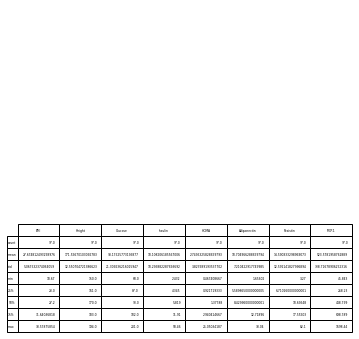

In [20]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, agg_stats)  # where df is your data frame

plt.savefig('aggr_stats.png')

For only cancer patients

In [13]:
label_cancer = data[data['Label'] == 2]
label_cancer.describe()

,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,56.807692,27.167446,171.730769,2.0,106.288462,12.564481,3.711366,27.720650,10.615498,17.057816,563.816288
std,14.429054,4.583536,12.218782,0.0,24.774541,12.789162,4.905591,20.042640,6.467862,12.457474,380.282997
min,34.000000,19.560000,150.000000,2.0,74.000000,2.432000,0.507936,6.333900,1.656020,3.270000,90.090000
25%,45.000000,22.877835,161.500000,2.0,92.000000,4.397000,1.036842,12.821425,6.241654,8.113675,287.214000
50%,53.000000,27.015000,172.000000,2.0,99.500000,6.772500,1.854588,20.431300,8.867328,13.943220,465.374000
75%,68.250000,30.810069,179.250000,2.0,112.000000,16.595250,4.461312,37.619200,12.912936,22.965170,744.692250
max,86.000000,37.109375,192.000000,2.0,201.000000,58.460000,25.050342,90.280000,33.750000,55.215300,1698.440000


For non-cancer patients

In [14]:
label_no = data[data['Label'] == 1]
label_no.describe()

,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,57.933333,28.261102,171.355556,1.0,88.800000,7.269844,1.638080,27.676293,10.808352,11.740098,477.080844
std,19.334848,5.569736,13.059576,0.0,10.564951,5.131318,1.286254,19.963276,8.057558,12.270771,280.305574
min,24.000000,18.670000,151.000000,1.0,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000
25%,38.000000,23.010000,161.000000,1.0,83.000000,4.345000,0.890787,14.090000,5.462620,5.625920,252.449000
50%,66.000000,27.700000,167.000000,1.0,88.000000,5.663000,1.203832,21.786300,8.130000,8.415600,444.395000
75%,75.000000,32.500000,184.000000,1.0,94.000000,8.079000,1.873251,35.891000,11.787960,12.936100,632.220000
max,89.000000,38.578759,194.000000,1.0,118.000000,26.211000,7.111918,83.482100,38.040000,82.100000,1256.083000


#### What is the proportion of patients with identified cancer below 50 years of age?

Create new column above or below 50

24/52 = 46.15 %

In [31]:
def above_50(df):
    if df['Age'] > 50:
        return 1
    else:
        return 0

In [33]:
data['above_50'] = data.apply(above_50, axis=1)

In [57]:
below_50 = data[data['Age'] < 50]
below_50.describe()

,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,above_50
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,40.536585,26.592026,172.341463,1.585366,92.756098,10.170634,2.527700,22.881966,12.790225,14.892493,514.748488,0.0
std,6.888750,5.235437,11.934424,0.498779,13.271738,11.600530,3.265184,15.744131,8.339566,10.306121,307.318396,0.0
min,24.000000,18.670000,150.000000,1.000000,70.000000,2.432000,0.467409,6.333900,3.886145,3.320000,63.610000,0.0
25%,36.000000,22.030000,162.000000,1.000000,86.000000,3.469000,0.780651,12.261700,6.644245,6.920000,293.123000,0.0
50%,43.000000,26.562500,173.000000,2.000000,90.000000,5.663000,1.203832,16.735300,9.702400,12.065340,518.586000,0.0
75%,45.000000,31.250000,178.000000,2.000000,99.000000,10.555000,2.629602,31.038500,17.950000,21.443660,656.393000,0.0
max,49.000000,36.512637,193.000000,2.000000,134.000000,58.460000,15.285341,68.510200,38.040000,53.671700,1698.440000,0.0


/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


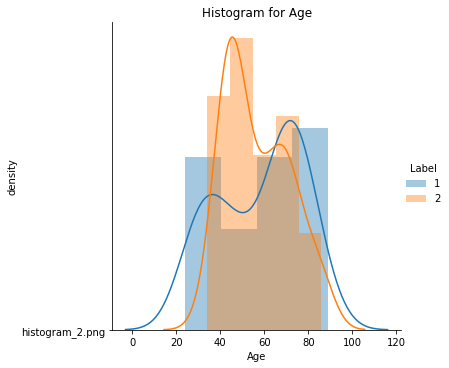

In [46]:
# Create a function for PDF analysis
def histoPDF(featureVar, classVar, input_data):
    sns.FacetGrid(input_data, hue = classVar, height = 5) \
    .map(sns.distplot, featureVar) \
    .add_legend(); 
    plt.title("Histogram for " + featureVar)
    plt.ylabel("density")
    plt.plot('histogram_2.png')# PDF histogram for age v. status
    
histoPDF('Age', 'Label', data)

/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


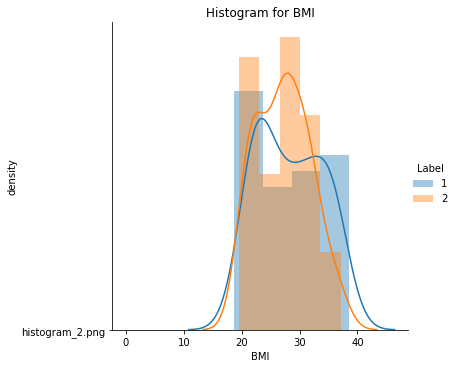

In [47]:
histoPDF('BMI', 'Label', data)

In [55]:
above_50 = data[data['Age'] > 50]
above_50.describe()

,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,above_50
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,69.981818,28.283727,170.709091,1.509091,102.072727,10.123582,2.933025,30.947387,9.260271,14.416995,523.549764,1.0
std,9.407426,4.677603,13.018040,0.504525,25.256356,9.410238,4.243682,22.034049,5.899783,14.246532,362.624638,0.0
min,51.000000,20.690495,151.000000,1.000000,60.000000,2.740000,0.519184,4.311000,1.656020,3.270000,45.843000,1.0
25%,64.500000,24.550000,159.000000,1.000000,89.000000,4.555000,1.025617,15.026700,5.445952,6.493165,259.750000,1.0
50%,69.000000,27.700000,168.000000,2.000000,97.000000,6.470000,1.658774,24.846000,8.125550,10.330000,426.175000,1.0
75%,76.000000,31.543455,183.500000,2.000000,103.500000,12.229000,3.005911,40.106500,10.601910,16.480130,701.381000,1.0
max,89.000000,37.109375,194.000000,2.000000,201.000000,51.814000,25.050342,90.280000,33.750000,82.100000,1698.440000,1.0


#### Compare the distribution of BMI patients identified with cancer over 50, to the distribution of BMI for patients identified with cancer who are under 50.

In [34]:
# filter cancer patients only
wt_cancer = data[data['Label'] == 2]

/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


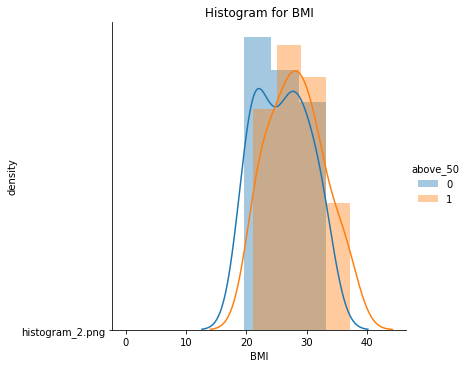

In [48]:
histoPDF('BMI', 'above_50', wt_cancer)

All patients above BMI what? have cancer

In [94]:
label_no = data[data['Label'] == 1]
label_no.sort_values('Insulin', axis=0, ascending=False).head()

,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,above_50
72,Debra Hunter,76.0,27.100000,194,1,110.0,26.211,7.111918,21.7780,4.935635,8.49395,45.843,1
74,Inaaya Galvan,43.0,34.422174,159,1,89.0,23.194,5.091856,31.2128,8.300955,6.71026,960.246,0
27,Ikra Spooner,61.0,32.038959,180,1,85.0,18.077,3.790144,30.7729,7.780255,13.68392,444.395,1
11,Deborah Corbett,66.0,36.212279,168,1,101.0,15.533,3.869788,74.7069,7.539550,22.32024,864.968,1
84,Ari Joyce,76.0,27.200000,151,1,94.0,14.070,3.262364,35.8910,9.346630,8.41560,377.227,1


#### What if you consider only the people in the 50+ age group who have increased fasting blood glucose (Glucose) and insulin?

Increased fasting blood:
Glucose = 130 mg/dL
Insulin = 12 ulU/ml

In [42]:
inc_glucose = wt_cancer[wt_cancer['Glucose'] > 130]
inc_insulin = inc_glucose[inc_glucose['Insulin'] > 12]
inc_insulin

,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,above_50
24,Annabella Sheridan,58.0,29.154519,184,2,139.0,16.582,5.685415,22.8884,10.262660,13.97399,923.886,1
47,Mercedes Smart,86.0,27.180000,170,2,138.0,19.910,6.777364,90.2800,14.110000,4.35000,90.090,1
60,Maheen Hinton,49.0,32.461911,152,2,134.0,24.887,8.225983,42.3914,10.793940,5.76800,656.393,0
69,Ebony Salas,86.0,26.666667,170,2,201.0,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,1
90,Zachary Hanna,85.0,27.688778,167,2,196.0,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,1


/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


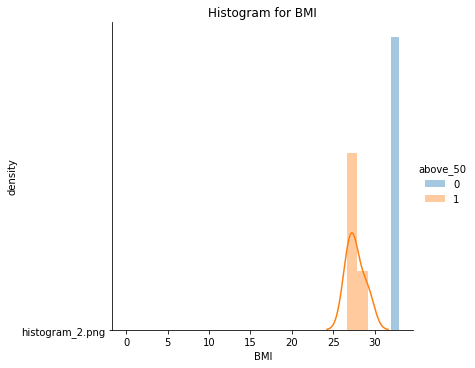

In [49]:
histoPDF('BMI', 'above_50', inc_insulin)

High glucose and insulin in all above 50 patients all have cancer (same as above)

In [51]:
data_glucose = data[data['Glucose'] > 130]
data_insulin = data_glucose[data_glucose['Insulin'] > 12]
data_insulin

,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,above_50
24,Annabella Sheridan,58.0,29.154519,184,2,139.0,16.582,5.685415,22.8884,10.262660,13.97399,923.886,1
47,Mercedes Smart,86.0,27.180000,170,2,138.0,19.910,6.777364,90.2800,14.110000,4.35000,90.090,1
60,Maheen Hinton,49.0,32.461911,152,2,134.0,24.887,8.225983,42.3914,10.793940,5.76800,656.393,0
69,Ebony Salas,86.0,26.666667,170,2,201.0,41.611,20.630734,47.6470,5.357135,24.37010,1698.440,1
90,Zachary Hanna,85.0,27.688778,167,2,196.0,51.814,25.050342,70.8824,7.901685,55.21530,1078.359,1


/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


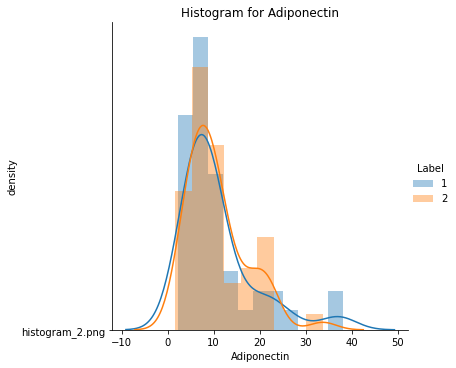

In [61]:
histoPDF('Adiponectin', 'Label', data)

/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


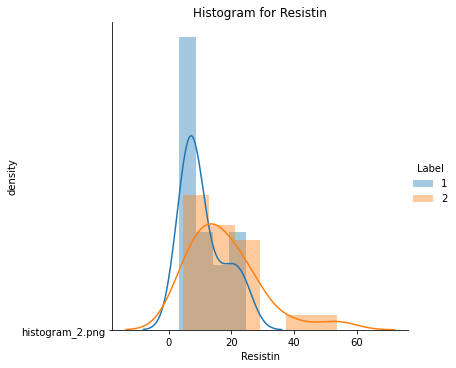

In [58]:
histoPDF('Resistin', 'Label', below_50)

/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ceri/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


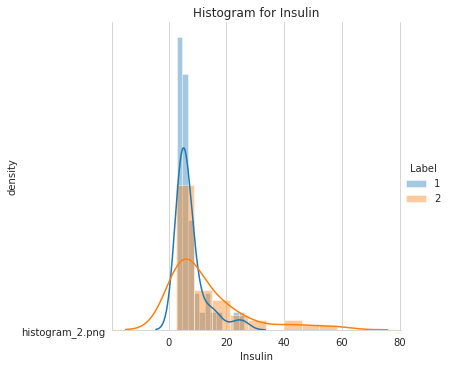

In [92]:
histoPDF('Insulin', 'Label', data)

### Bivariate analysis

#### Pairgrid plots

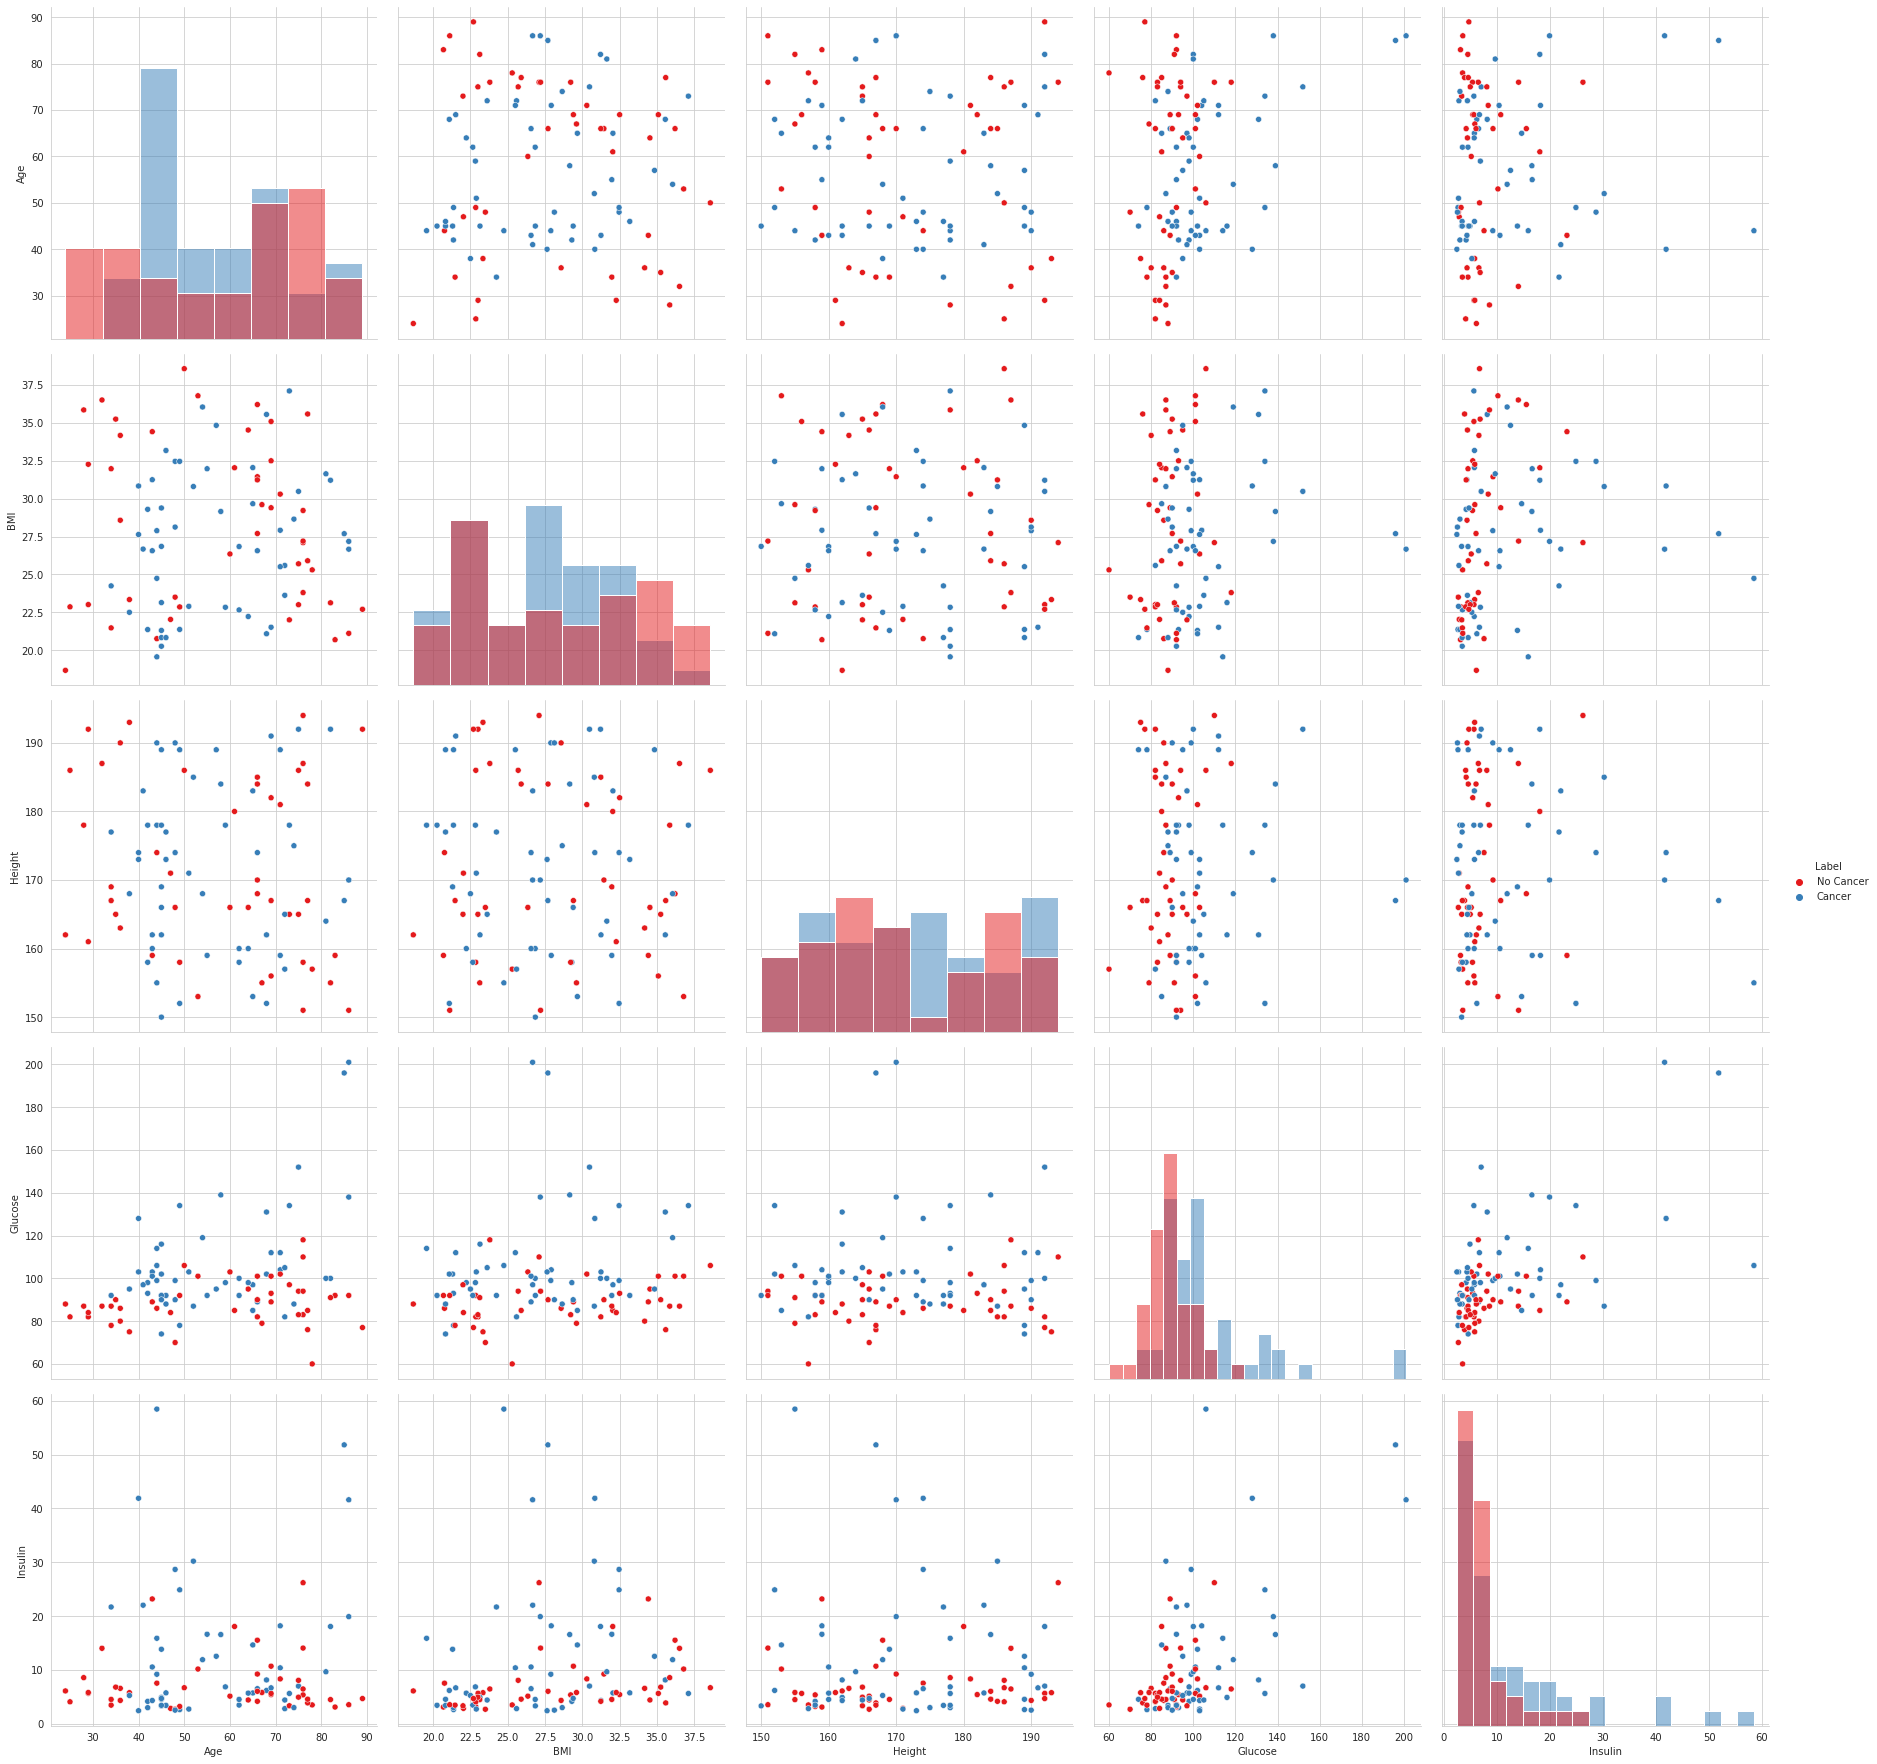

In [76]:
import seaborn as sns

data_alt = data.drop(['Name'], axis=1)

res = {2: "Cancer",
        1: "No Cancer"}

data_alt = data_alt.replace({'Label':res})
# 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'
x_vars = ['Age', "BMI", "Height", "Glucose", 'Insulin']
y_vars = ["Age", "BMI", "Height", "Glucose", 'Insulin']

sns.set_style('whitegrid')
grid = sns.PairGrid(data_alt, hue="Label", palette='Set1', height=5, x_vars=x_vars, y_vars=y_vars)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

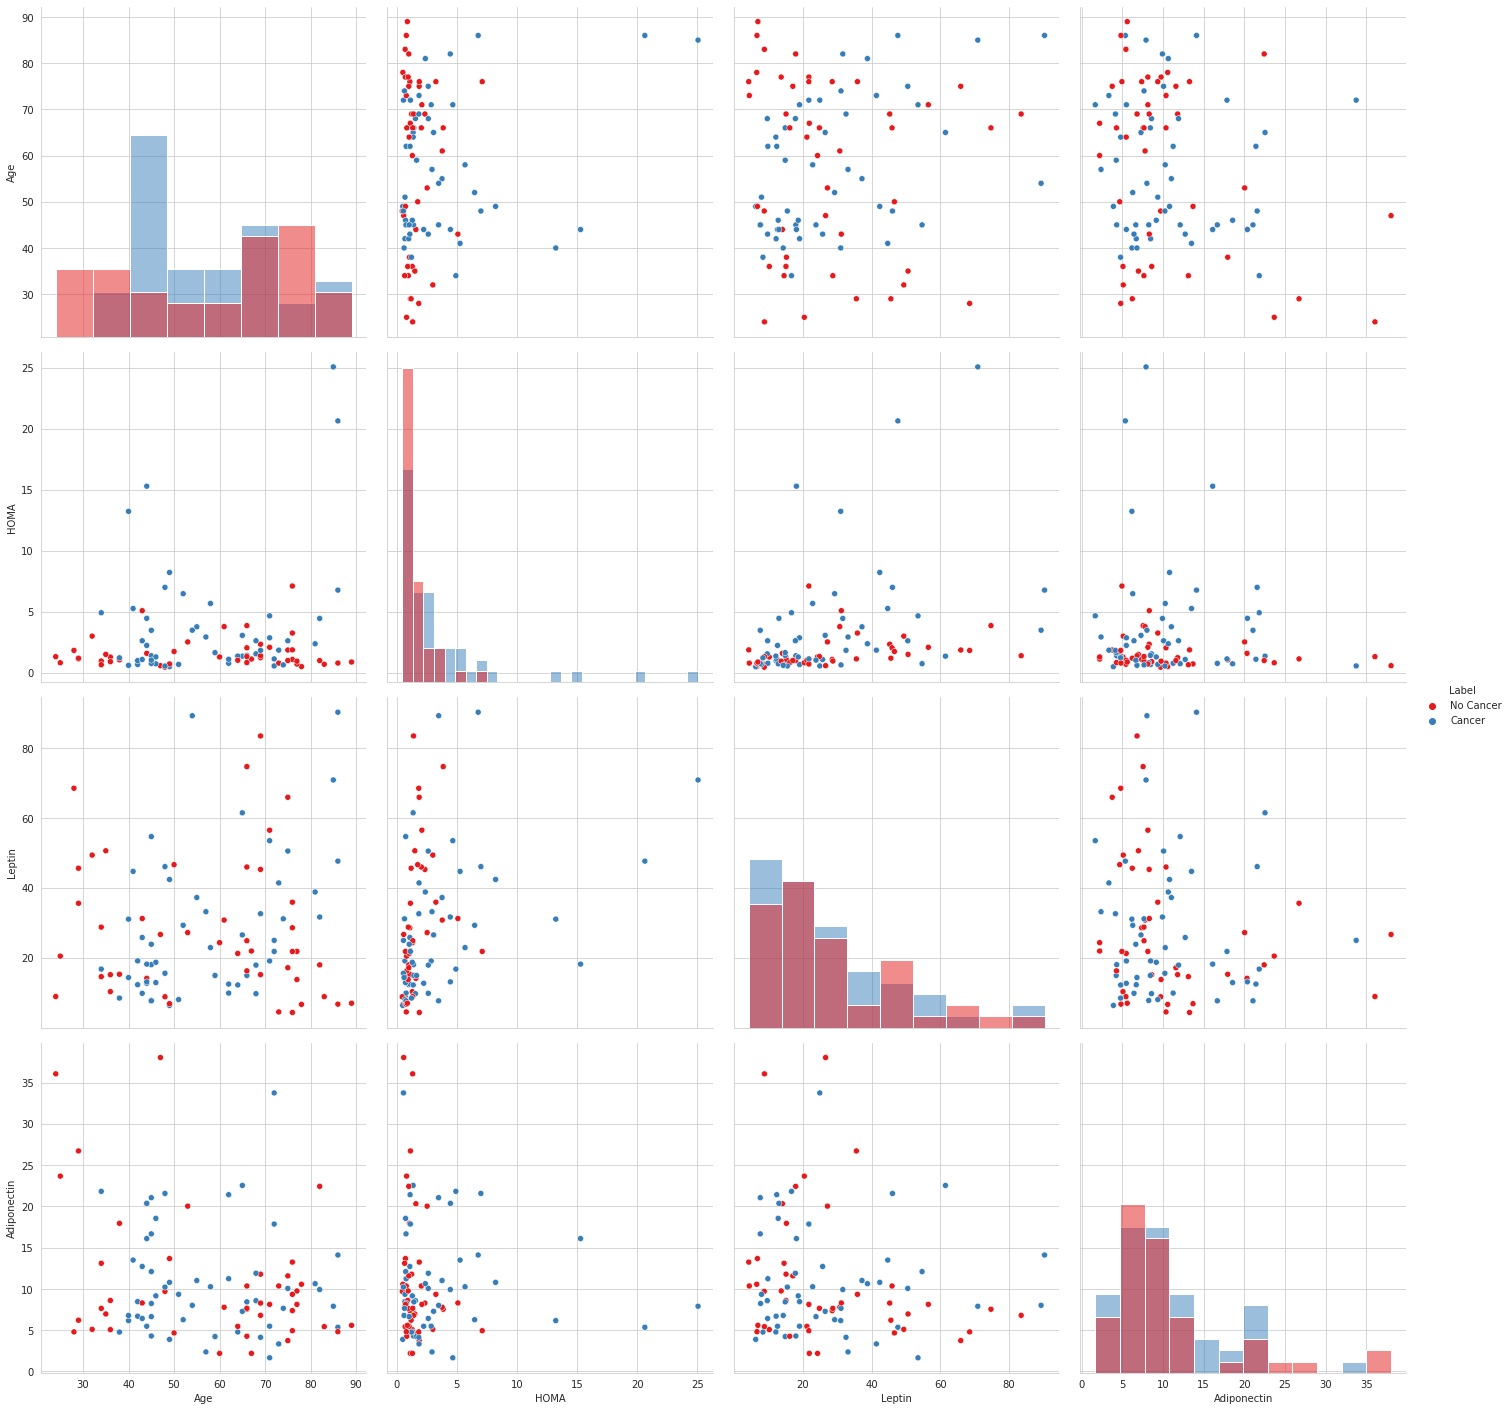

In [79]:
x_vars = ['Age', 'HOMA', 'Leptin', 'Adiponectin']
y_vars = ['Age', 'HOMA', 'Leptin', 'Adiponectin']

sns.set_style('whitegrid')
grid = sns.PairGrid(data_alt, hue="Label", palette='Set1', height=5, x_vars=x_vars, y_vars=y_vars)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

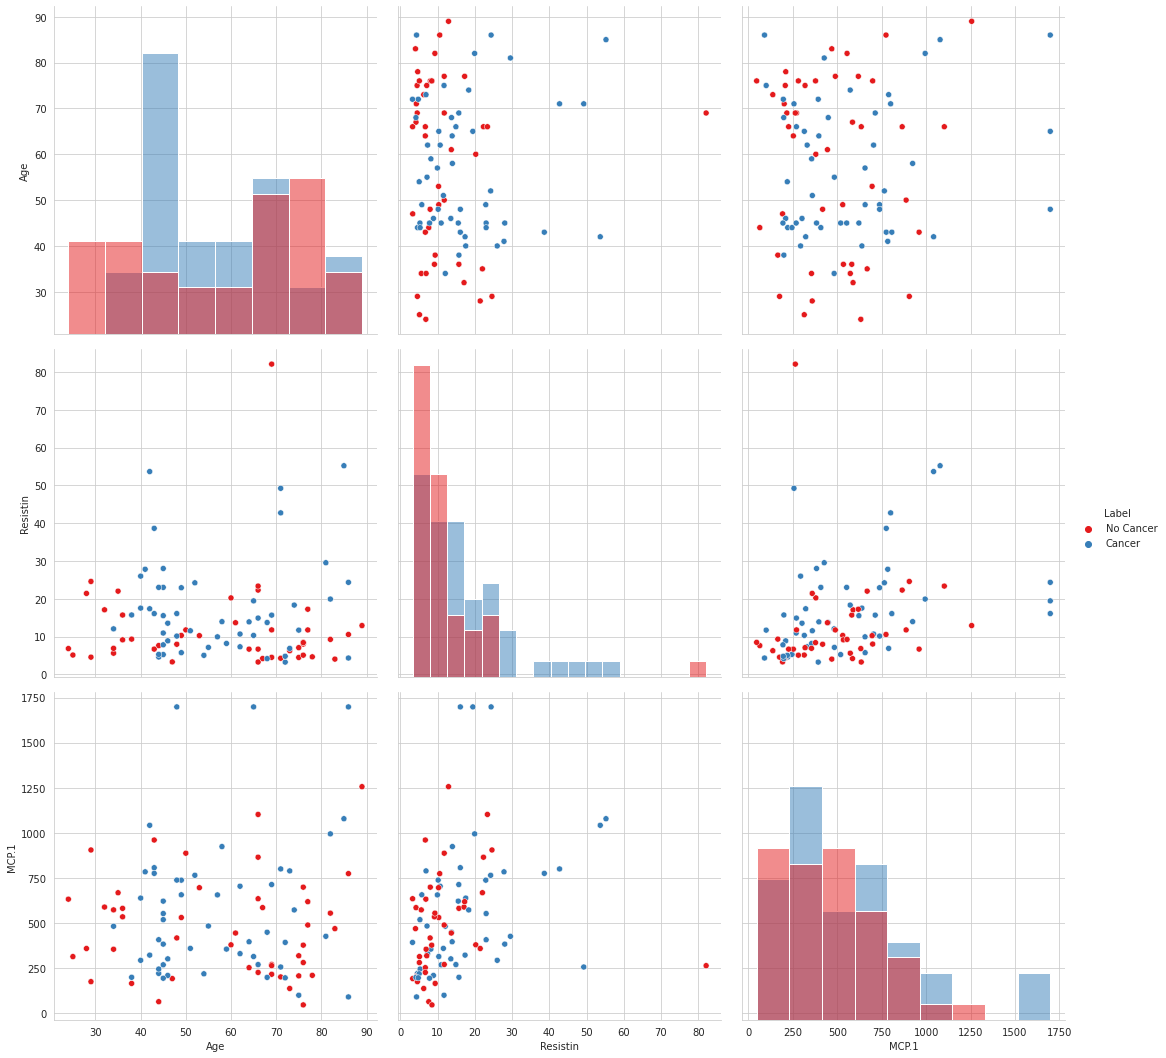

In [80]:
#'Resistin', 'MCP.1'

x_vars = ['Age', 'Resistin', 'MCP.1']
y_vars = ['Age', 'Resistin', 'MCP.1']

sns.set_style('whitegrid')
grid = sns.PairGrid(data_alt, hue="Label", palette='Set1', height=5, x_vars=x_vars, y_vars=y_vars)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

### Univariate analysis

#### Box plots

<Figure size 432x288 with 0 Axes>

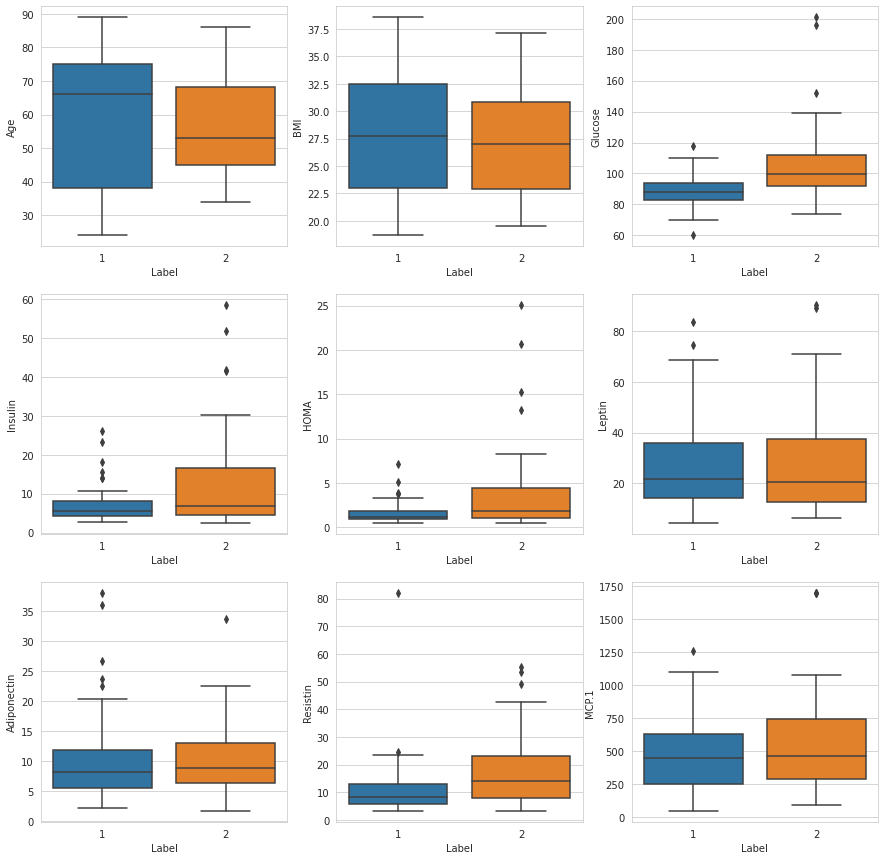

In [84]:
# Create box and whisker plot for each feature
plt.figure(1)
plt.figure(figsize = (15, 15))
plt.subplot(331)
sns.boxplot(x = 'Label', y = 'Age', data = data)
plt.subplot(332)
sns.boxplot(x = 'Label', y = 'BMI', data = data)
plt.subplot(333)
sns.boxplot(x = 'Label', y = 'Glucose', data = data)
plt.subplot(334)
sns.boxplot(x = 'Label', y = 'Insulin', data = data)
plt.subplot(335)
sns.boxplot(x = "Label",y = 'HOMA', data = data)
plt.subplot(336)
sns.boxplot(x = "Label",y = 'Leptin', data = data)
plt.subplot(337)
sns.boxplot(x = "Label",y = 'Adiponectin', data = data)
plt.subplot(338)
sns.boxplot(x = "Label",y = 'Resistin', data = data)
plt.subplot(339)
sns.boxplot(x = "Label",y = 'MCP.1', data = data)
plt.show()

### Violin Plot

<Figure size 432x288 with 0 Axes>

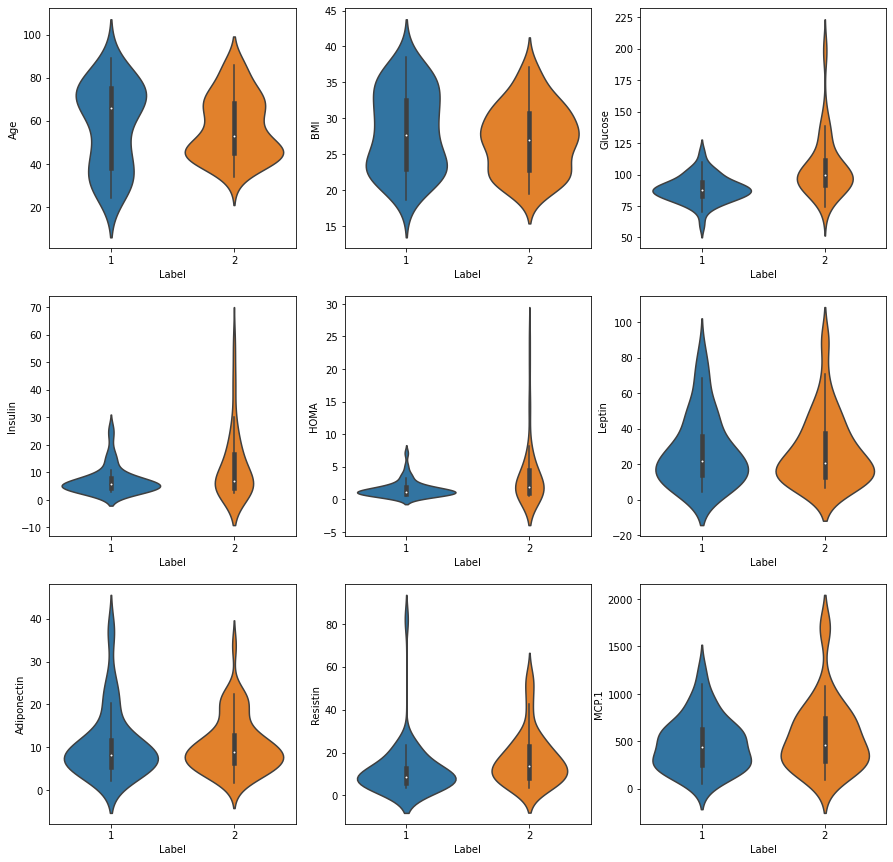

In [75]:
plt.figure(1)
plt.figure(figsize = (15, 15))
plt.subplot(331)
sns.violinplot(x = "Label",y = "Age",data = data,height = 10)
plt.subplot(332)
sns.violinplot(x = "Label",y = "BMI",data = data,height = 10)
plt.subplot(333)
sns.violinplot(x = "Label",y = "Glucose",data = data, height = 10)
plt.subplot(334)
sns.violinplot(x = "Label",y = "Insulin",data = data, height = 10)
plt.subplot(335)
sns.violinplot(x = "Label",y = 'HOMA', data = data, height = 10)
plt.subplot(336)
sns.violinplot(x = "Label",y = 'Leptin', data = data, height = 10)
plt.subplot(337)
sns.violinplot(x = "Label",y = 'Adiponectin', data = data, height = 10)
plt.subplot(338)
sns.violinplot(x = "Label",y = 'Resistin', data = data, height = 10)
plt.subplot(339)
sns.violinplot(x = "Label",y = 'MCP.1', data = data, height = 10)
plt.show()

#'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'

### Multivariate analysis

#### Contour plots

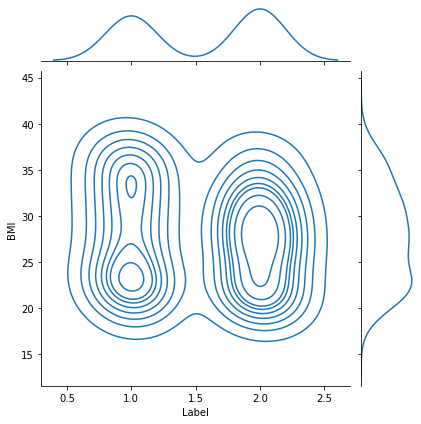

In [20]:
sns.jointplot(x = "Label", y = "BMI", data = data, kind = "kde")
plt.show()

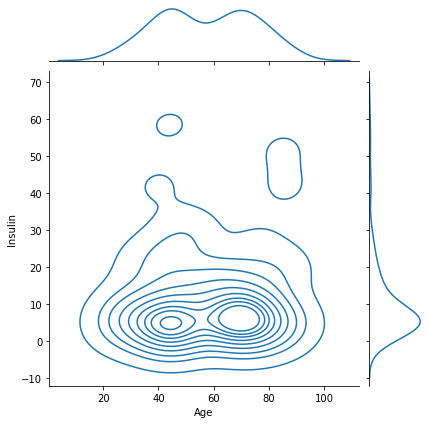

In [11]:
sns.jointplot(x = "Age", y = "Insulin", data = data, kind = "kde")
plt.show()

In [18]:
data.sort_values('Age', axis=0, ascending=True).head(20)

,Name,Age,BMI,Height,Label,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
64,Kavan Vazquez,24.0,18.670000,162,1,88.0,6.107,1.330000,8.8800,36.060000,6.85000,632.220
52,Martine Dudley,25.0,22.860000,186,1,82.0,4.090,0.827271,20.4500,23.670000,5.14000,313.730
87,Ricardo Donovan,28.0,35.855815,178,1,87.0,8.576,1.840410,68.5102,4.794200,21.44366,358.624
54,Salma Dunn,29.0,32.270788,161,1,84.0,5.810,1.203832,45.6196,6.209635,24.60330,904.981
33,Larissa Frye,29.0,23.010000,192,1,82.0,5.663,1.145436,35.5900,26.720000,4.58000,174.800
13,Sommer O'Connor,32.0,36.512637,187,1,87.0,14.026,3.009980,49.3727,5.100000,17.10223,588.460
4,Tahmina Carty,34.0,24.242424,177,2,92.0,21.699,4.924226,16.7353,21.823745,12.06534,481.949
45,Joni Jacobson,34.0,31.975015,169,1,87.0,4.530,0.972138,28.7502,7.642760,5.62592,572.783
76,Lamar Baker,34.0,21.470000,167,1,78.0,3.469,0.667436,14.5700,13.110000,6.92000,354.600
37,Bernice Chan,35.0,35.250761,165,1,90.0,6.817,1.513374,50.6094,6.966895,22.03703,667.928


#### Conclusions:

Increased fasting blood:
Glucose = 130 mg/dL
Insulin = 12 ulU/ml

1. High values for glucose (> 118 mg/dL), insulin (> 26.211 ulU/ml), HOMA and MCP.1 can be associated with a patient having cancer, however the proportion is too low to make conclusive statements.

2. High blood glucose levels are correlated to higher age groups, where the highest records (201.0mg/dL and 196.0mg/dL) are associated with the older patients (86y/o) the oldest patient being 89y/o.

4. We can say there is a threshold age range (40-50) above which the chances of a patient getting cancer is much more likely. This is in concurrence with current breast cancer trends.

3. The objective of classifying the cancer status of a patient is difficult and will likely produce unreliable results because the dataset is small and needs additional features.

#### Improvement on data:

- More samples: for lower estimation variance and better predictive performance. Small sample size can lead to overfitting of the model.

- History of breast cancer: A woman who has had breast cancer in one breast is at an increased risk of developing cancer in her other breast.

- Family history of breast cancer: A woman has a higher risk of breast cancer if her mother, sister or daughter had breast cancer, especially at a young age (before 40). 

- Genetic factors: Women with certain genetic mutations, including changes to the BRCA1 and BRCA2 genes, are at higher risk of developing breast cancer during their lifetime.

- Childbearing and menstrual history: The older a woman is when she has her first child, the greater her risk of breast cancer.

- Cancer label: status of the cancer the patients have is unknown. i.e. benign, malignant or in remission. These can determine the survivability of a patient. 

Recommended Screening Guidelines:

Mammography: The most important screening test for breast cancer is the mammogram. A mammogram is an X-ray of the breast. It can detect breast cancer up to two years before the tumor can be felt by you or your doctor.

Women age 40–45 or older who are at average risk of breast cancer should have a mammogram once a year.

Women at high risk should have yearly mammograms along with an MRI starting at age 30.